In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEmodb_Ek_new.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [4]:
df = data
df.shape

(535, 196)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [6]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,14.751010,17.490223,16.878034,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,14.512919,17.550766,19.076122,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,16.131910,18.237524,19.299087,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,15.816742,17.617843,17.377833,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,14.601713,14.795569,19.625183,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,16.838569,17.835524,19.693569,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,15.286078,17.031323,18.757498,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,14.402789,15.672307,17.590725,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,19.920409,19.619588,21.609127,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701


In [8]:
y

0      6
1      3
2      1
3      6
4      3
      ..
530    2
531    7
532    7
533    1
534    1
Name: emo, Length: 535, dtype: int64

In [9]:
X_speaker

0       3
1       3
2       3
3       3
4       3
       ..
530    16
531    16
532    16
533    16
534    16
Name: speaker, Length: 535, dtype: int64

In [10]:
X.shape, y.shape

((535, 193), (535,))

In [11]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
117,-239.764008,139.099991,-36.230679,64.189774,-15.741068,25.634315,-4.790334,-11.361882,-4.120832,-5.749265,...,14.843166,17.267064,20.333906,52.065033,0.024090,0.007341,0.069747,-0.166069,0.011784,0.016121
132,-260.317963,83.698997,-62.219009,62.837143,-29.033827,-5.925933,-19.271563,-22.503176,-11.056346,-14.001642,...,17.166468,18.111217,22.519248,54.400206,-0.004591,0.047589,-0.013484,0.051093,0.001319,0.016818
154,-258.790070,111.870972,-39.346752,41.019382,-7.644496,12.690877,-9.099957,-7.537449,-21.245274,-4.533050,...,16.004872,17.305083,18.331014,55.222186,-0.014079,-0.010854,0.063290,-0.047139,0.007506,-0.007546
245,-248.415848,140.136810,-54.752460,59.543102,-15.653415,13.293295,-11.262449,-3.968599,-12.746889,-5.119174,...,15.127516,17.180208,18.952523,55.315247,0.024211,0.022074,-0.025763,-0.078729,-0.007502,-0.008905
84,-271.101715,114.182411,-38.098175,28.942293,-24.289883,4.521724,-15.069010,-4.291117,-13.700146,-10.009334,...,18.606591,19.001541,18.857394,57.109288,-0.009274,0.027404,-0.000096,-0.020396,0.009333,-0.022284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-227.954727,85.081978,-58.060806,36.880703,-40.687836,12.664502,-30.147270,-10.475245,-2.788741,-18.911095,...,17.908426,19.134608,18.232150,58.157041,0.024658,-0.009180,-0.002439,0.034757,0.021257,-0.008066
106,-281.011719,81.203072,-46.238575,46.518276,-30.387165,4.483186,-15.096430,-2.682035,-10.517467,-20.056936,...,18.526438,19.252223,18.605096,57.006848,0.008616,0.009848,-0.021393,-0.002289,-0.009699,0.001744
270,-210.938858,138.555298,-38.752594,46.934879,-27.053715,-1.506808,3.063251,-5.027531,-23.228069,-7.718493,...,18.211423,17.517405,21.065693,56.056814,-0.017440,0.011268,-0.033607,-0.010188,-0.000729,-0.027539
435,-218.649277,122.726830,-28.866823,65.878014,-7.769287,35.246620,-3.790648,6.997354,-5.520399,-8.897484,...,15.274676,16.397692,18.600169,57.831954,0.032818,0.117523,0.122300,-0.055600,-0.050631,0.028001


In [13]:
X_speaker

117     9
132     9
154    10
245    12
84      8
       ..
71      8
106     8
270    12
435    15
102     8
Name: speaker, Length: 535, dtype: int64

In [14]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [15]:
y1

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
X.shape, y1.shape

((535, 193), (535, 7))

In [17]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [18]:
X2.shape, X2_speaker.shape, y2.shape

((535, 193), (535,), (535,))

In [19]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [20]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [21]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-239.764008,139.099991,-36.230679,64.189774,-15.741068,25.634315,-4.790334,-11.361882,-4.120832,-5.749265,...,14.843166,17.267064,20.333906,52.065033,0.024090,0.007341,0.069747,-0.166069,0.011784,0.016121
1,-260.317963,83.698997,-62.219009,62.837143,-29.033827,-5.925933,-19.271563,-22.503176,-11.056346,-14.001642,...,17.166468,18.111217,22.519248,54.400206,-0.004591,0.047589,-0.013484,0.051093,0.001319,0.016818
2,-258.790070,111.870972,-39.346752,41.019382,-7.644496,12.690877,-9.099957,-7.537449,-21.245274,-4.533050,...,16.004872,17.305083,18.331014,55.222186,-0.014079,-0.010854,0.063290,-0.047139,0.007506,-0.007546
3,-248.415848,140.136810,-54.752460,59.543102,-15.653415,13.293295,-11.262449,-3.968599,-12.746889,-5.119174,...,15.127516,17.180208,18.952523,55.315247,0.024211,0.022074,-0.025763,-0.078729,-0.007502,-0.008905
4,-271.101715,114.182411,-38.098175,28.942293,-24.289883,4.521724,-15.069010,-4.291117,-13.700146,-10.009334,...,18.606591,19.001541,18.857394,57.109288,-0.009274,0.027404,-0.000096,-0.020396,0.009333,-0.022284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-227.954727,85.081978,-58.060806,36.880703,-40.687836,12.664502,-30.147270,-10.475245,-2.788741,-18.911095,...,17.908426,19.134608,18.232150,58.157041,0.024658,-0.009180,-0.002439,0.034757,0.021257,-0.008066
531,-281.011719,81.203072,-46.238575,46.518276,-30.387165,4.483186,-15.096430,-2.682035,-10.517467,-20.056936,...,18.526438,19.252223,18.605096,57.006848,0.008616,0.009848,-0.021393,-0.002289,-0.009699,0.001744
532,-210.938858,138.555298,-38.752594,46.934879,-27.053715,-1.506808,3.063251,-5.027531,-23.228069,-7.718493,...,18.211423,17.517405,21.065693,56.056814,-0.017440,0.011268,-0.033607,-0.010188,-0.000729,-0.027539
533,-218.649277,122.726830,-28.866823,65.878014,-7.769287,35.246620,-3.790648,6.997354,-5.520399,-8.897484,...,15.274676,16.397692,18.600169,57.831954,0.032818,0.117523,0.122300,-0.055600,-0.050631,0.028001


In [22]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,9
1,9
2,10
3,12
4,8
...,...
530,8
531,8
532,12
533,15


In [23]:
speakers = X_speaker.unique()
speakers

array([ 9, 10, 12,  8, 14,  3, 16, 13, 11, 15], dtype=int64)

In [24]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,9
1,9
2,10
3,12
4,8
...,...
530,8
531,8
532,12
533,15


In [25]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-239.764008,139.099991,-36.230679,64.189774,-15.741068,25.634315,-4.790334,-11.361882,-4.120832,-5.749265,...,17.267064,20.333906,52.065033,0.024090,0.007341,0.069747,-0.166069,0.011784,0.016121,9
1,-260.317963,83.698997,-62.219009,62.837143,-29.033827,-5.925933,-19.271563,-22.503176,-11.056346,-14.001642,...,18.111217,22.519248,54.400206,-0.004591,0.047589,-0.013484,0.051093,0.001319,0.016818,9
2,-258.790070,111.870972,-39.346752,41.019382,-7.644496,12.690877,-9.099957,-7.537449,-21.245274,-4.533050,...,17.305083,18.331014,55.222186,-0.014079,-0.010854,0.063290,-0.047139,0.007506,-0.007546,10
3,-248.415848,140.136810,-54.752460,59.543102,-15.653415,13.293295,-11.262449,-3.968599,-12.746889,-5.119174,...,17.180208,18.952523,55.315247,0.024211,0.022074,-0.025763,-0.078729,-0.007502,-0.008905,12
4,-271.101715,114.182411,-38.098175,28.942293,-24.289883,4.521724,-15.069010,-4.291117,-13.700146,-10.009334,...,19.001541,18.857394,57.109288,-0.009274,0.027404,-0.000096,-0.020396,0.009333,-0.022284,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-227.954727,85.081978,-58.060806,36.880703,-40.687836,12.664502,-30.147270,-10.475245,-2.788741,-18.911095,...,19.134608,18.232150,58.157041,0.024658,-0.009180,-0.002439,0.034757,0.021257,-0.008066,8
531,-281.011719,81.203072,-46.238575,46.518276,-30.387165,4.483186,-15.096430,-2.682035,-10.517467,-20.056936,...,19.252223,18.605096,57.006848,0.008616,0.009848,-0.021393,-0.002289,-0.009699,0.001744,8
532,-210.938858,138.555298,-38.752594,46.934879,-27.053715,-1.506808,3.063251,-5.027531,-23.228069,-7.718493,...,17.517405,21.065693,56.056814,-0.017440,0.011268,-0.033607,-0.010188,-0.000729,-0.027539,12
533,-218.649277,122.726830,-28.866823,65.878014,-7.769287,35.246620,-3.790648,6.997354,-5.520399,-8.897484,...,16.397692,18.600169,57.831954,0.032818,0.117523,0.122300,-0.055600,-0.050631,0.028001,15


In [26]:
import numpy as np

selected_speakers = np.random.choice(speakers, size=5, replace=False)

print(selected_speakers)

[ 8  9  3 13 15]


In [27]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=535
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='Emodb_speaker_both'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 8
Train speakers: [ 3  9 10 11 12 13 14 15 16]
No overlap in fold 0.
Selected FS indices: [ 54   3   0   6   2   4   1 122  29   7  12  10 155  30  87  82 162 120
 134 121 150 106 114  24  35  20  43  17  19  99  11  96  14  68 126  72
 137 138 169 171 151 140  84  80  94 103  69  40  55  97 125 130 179 160
 109  38  36  48  47  85 124 116 107 152 157 165 143 154 133 141 147 118
 139 166 184 181 180 178 176 172 174 156 170 148 149 146 119  37  53  77
  21  32  74  27  90  61  66  70 111  92  42  39  62  73  44  31  26  34
  52  59  83  75  67  49  46  64  57  65  78  89  81  91 104 101 108]
0
Epoch 1/700
15/15 [==============================] - 4s 158ms/step - loss: 2.1212 - accuracy: 0.1887 - val_loss: 2.4589 - val_accuracy: 0.0000e+00
Epoch 2/700
15/15 [==============================] - 2s 121ms/step - loss: 1.8516 - accuracy: 0.2851 - val_loss: 2.2197 - val_accuracy: 0.1034
Epoch 3/700
15/15 [==============================] - 2s 123ms/step - loss: 1.7277 - accur

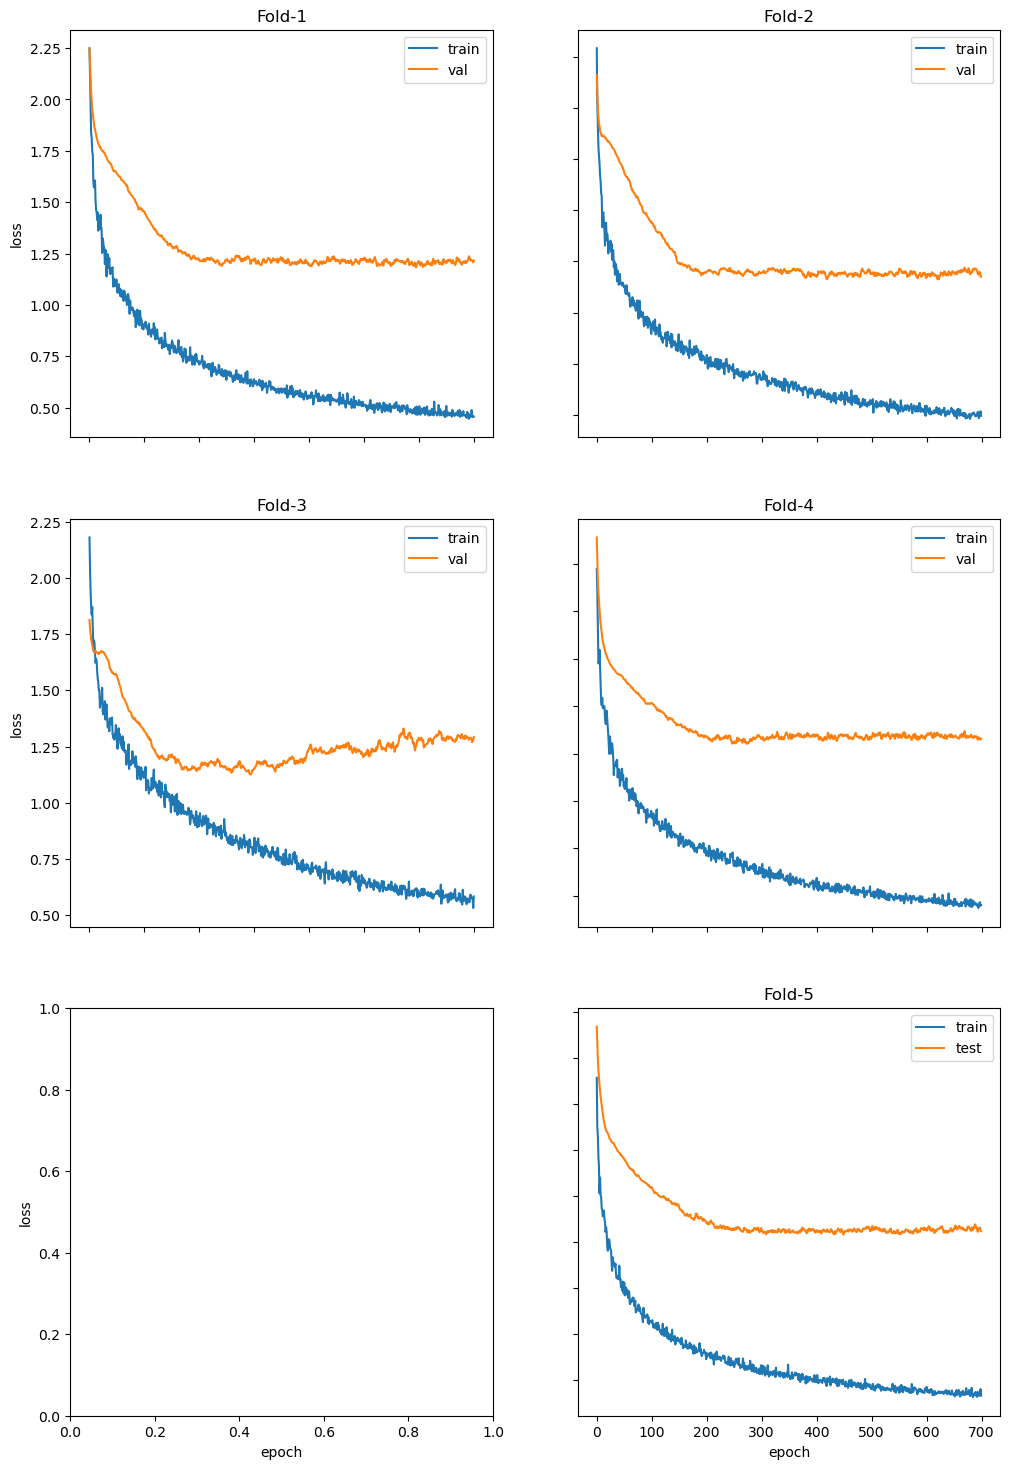

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [36]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_speaker_both'
m='Model_4'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [37]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X4.npy')
yloaded=np.load(savedir+'/y4.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 62.50%


Fold 0: 44.83%

Fold 1: 51.16%

Fold 2: 57.14%

Fold 3: 63.93%

Fold 4: 62.50%

In [38]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 22ms/step
(56, 7)
56


array([[12,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  8],
       [ 0,  3,  8,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  1,  0,  0],
       [ 0,  0,  0,  1,  6,  1,  0],
       [ 2,  0,  0,  1,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  4]], dtype=int64)

In [39]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 92.3   0.    0.    0.    7.7   0.    0. ]
 [  0.    0.    0.   11.1   0.    0.   88.9]
 [  0.   27.3  72.7   0.    0.    0.    0. ]
 [  0.    0.   20.   60.   20.    0.    0. ]
 [  0.    0.    0.   12.5  75.   12.5   0. ]
 [ 33.3   0.    0.   16.7  16.7  33.3   0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


         angry  bored  neutral  disgust  fear  happy    sad
angry     92.3    0.0      0.0      0.0   7.7    0.0    0.0
bored      0.0    0.0      0.0     11.1   0.0    0.0   88.9
neutral    0.0   27.3     72.7      0.0   0.0    0.0    0.0
disgust    0.0    0.0     20.0     60.0  20.0    0.0    0.0
fear       0.0    0.0      0.0     12.5  75.0   12.5    0.0
happy     33.3    0.0      0.0     16.7  16.7   33.3    0.0
sad        0.0    0.0      0.0      0.0   0.0    0.0  100.0



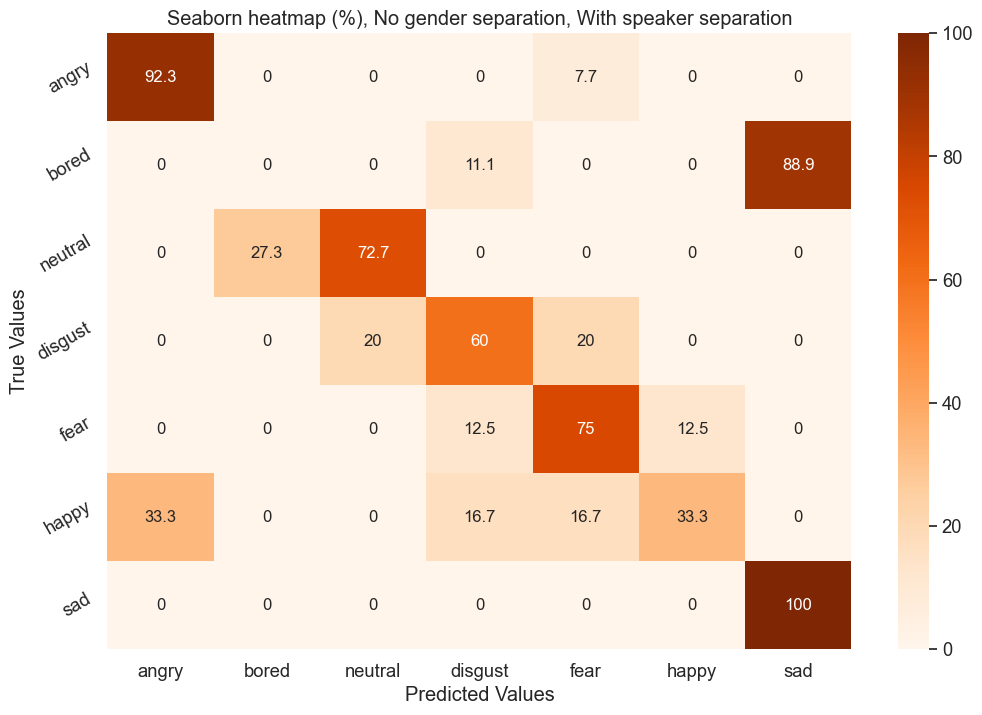

In [41]:
listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), No gender separation, With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()